# **Linear Regression**

Kaggle'daki bu veri seti, önemsiz gibi görünse de, lineer regresyon analizi için standart bir kaynak sağlamayı amaçlamaktadır. 0 ile 100 arasında değişen x-değerlerinin bulunduğu 700 veri çifti (x,y) içeren bir CSV dosyasından oluşmaktadır. Karşılık gelen y-değerleri, Excel fonksiyonu NORMINV(RAND(), x, 3) kullanılarak üretilmiştir; bu da y için en iyi tahminin doğrudan x'e eşit olması gerektiğini göstermektedir
______________
This dataset on Kaggle, while seemingly trivial, is designed to provide a standardized resource for linear regression analysis. It consists of a CSV file with 700 data pairs (x,y), where x-values range from 0 to 100. The corresponding y-values are generated using the Excel function NORMINV(RAND(), x, 3), making it clear that the best estimate for y should be directly equal to x

<img src='https://pfst.cf2.poecdn.net/base/image/2e356632f5a8cbadf66459765d4ab3e61247fffa2685e6287139d2e72357b890?w=1024&h=768&pmaid=326989945' width='800'>
<a href='https://www.kaggle.com/datasets/andonians/random-linear-regression/data' target=_blank>
Click here for the dataset </a>

**Import library**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

**Read the data**

In [3]:
train = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

In [4]:
df = pd.concat([test, train], ignore_index=True)

**EDA - Exploratory Data Analysis**

In [6]:
df.head()

,x,y
0,77.0,79.775152
1,21.0,23.177279
2,22.0,25.609262
3,20.0,17.857388
4,36.0,41.849864


In [7]:
df.shape

(1000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [27]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [9]:
df.describe()

,x,y
count,1000.000000,999.000000
mean,53.771157,50.319804
std,113.747929,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


In [10]:
df.corr(numeric_only=True)

,x,y
x,1.000000,0.995071
y,0.995071,1.000000


In [11]:
import seaborn as sns

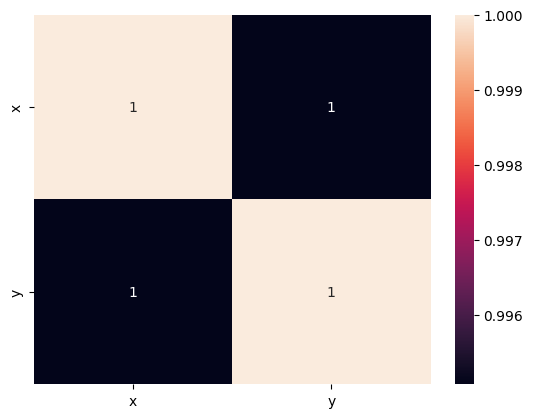

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

**Handling missing values**

In [28]:
df['y'].fillna(df['y'].median(), inplace=True)

count    1000.000000
mean       50.319410
std        29.074551
min        -3.839981
25%        25.227574
50%        49.926397
75%        74.463198
max       108.871618
Name: y, dtype: float64


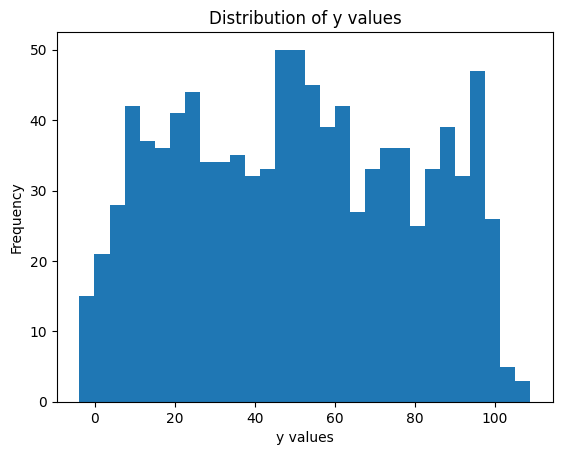

In [39]:
print(df['y'].describe())

import matplotlib.pyplot as plt

plt.hist(df['y'], bins=30)
plt.title('Distribution of y values')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.show()

 **Feature Engineering**

In [29]:
x = df[['x']] 
y = df['y']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

**Modelling**

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
model=lr.fit(x_train,y_train)

In [34]:
tahmin=model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
mean_squared_error(y_test,tahmin)**.5 

247.39477503028198

In [37]:
r2_score(y_test,tahmin)

-73.63596023523081

Summary

    Mean Squared Error (MSE): 247.39
    A high MSE value indicates that the model's predictions are, on average, far from the actual values.

    R² Value: -73.64
    A negative R² value shows that the model performs worse than a simple mean model, indicating very poor fit.

Conclusion

The results suggest that the current model is not well-suited to capture the relationship between the variables. It may be necessary to revise the model or consider additional features.